In [37]:
from cpymad.madx import Madx
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib

%config InlineBackend.figure_format = 'retina'
plt.rcParams["mathtext.fontset"] = "cm"

matplotlib.rcParams.update({'font.size': 15})
matplotlib.rc('font',**{'family':'serif'})

# Setting up the MAD-X environment

In [4]:
madx = Madx()
madx.command.beam('PARTICLE=PROTON, PC = 26.4;')
madx.input('BRHO := BEAM->PC * 3.3356;')
# call sequence of main units
madx.call('/eos/home-a/ahuschau/www/test-acc-models/repository/PS/2019/PS_MU.seq')
# call sequence of straight section elements
madx.call('/eos/home-a/ahuschau/www/test-acc-models/repository/PS/2019/PS_SS.seq')
# call general strength file
madx.call('/eos/home-a/ahuschau/www/test-acc-models/repository/PS/2019/PS.str')
madx.call('ps_ext_lhc.str')


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.04.02  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2018.10.03               +
  + Execution date: 2019.08.19 09:29:57      +
  ++++++++++++++++++++++++++++++++++++++++++++
/**********************************************************************************

* PLACEHOLDERS: 

* NOTE: reference to CDS note to be written to summarize changes

* TODO: at each occurrence an action still has to be done

************************************************************************************/



/**********************************************************************************

*

* Elements description and sequence file for each PS main unit (MU).

*

* Summary of changes with respect to previous versions available at NOTE

*

* 11/06/2019 - Alexander Huschauer

************************************************************************************/





/**********************************

/*******************************************************************************

**                        Low-energy quadrupoles                              **

*******************************************************************************/

!focussing



   PR.QFN05      , K1  :=  KQFN05;

   PR.QFN09      , K1  :=  KQFN09;

   PR.QFW17      , K1  :=  KQFW17;

   PR.QFN21      , K1  :=  KQFN21;

   PR.QFW27      , K1  :=  KQFW27;

   PR.QFW31      , K1  :=  KQFW31;

   PR.QFN35      , K1  :=  KQFN35;

   PR.QFN39      , K1  :=  KQFN39;

   PR.QFN45      , K1  :=  KQFN45;

   PR.QFN49      , K1  :=  KQFN49;

   PR.QFN55      , K1  :=  KQFN55;

   PR.QFW59      , K1  :=  KQFW59;

   PR.QFN67      , K1  :=  KQFN67;

   PR.QFN71      , K1  :=  KQFN71;

   PR.QFN77      , K1  :=  KQFN77;

   PR.QFN81      , K1  :=  KQFN81;

   PR.QFN85      , K1  :=  KQFN85;

   PR.QFN89      , K1  :=  KQFN89;

   PR.QFN95      , K1  :=  KQFN95;

   PR.QFN99      , K1  :=  KQFN99;





   KQFN05 : = kf

# Performing a PTC Twiss

In [23]:
madx.command.use(sequence = 'PS')
madx.command.ptc_create_universe()
madx.command.ptc_create_layout('time=false, model=2, exact=true, method=6, nst=5')
madx.command.ptc_twiss('closed_orbit, icase=56, no=4, slice_magnets')
madx.command.ptc_end

Determined SECTOR NMUL MAX :  2
 MAD-X Beam Parameters
                  Energy : 0.233665E+01
          Kinetic Energy : 0.139838E+01
      Particle Rest Mass : 0.938272E+00
                Momentum : 0.214000E+01
 Setting MADx with 
     energy           2.3366545526771887     
     method                   6
     Num. of steps            5
     charge           1.0000000000000000     
  Length of machine:    628.31850000000065     
 The machine is a RING
 ------------------------------------ PTC Survey ------------------------------------
 Before start:    0.0000000000000000        0.0000000000000000        0.0000000000000000     
 Before   end:    0.0000000000000000        0.0000000000000000        0.0000000000000000     
 After  start:    0.0000000000000000        0.0000000000000000        0.0000000000000000     
 After    end:   -2.6953046045052886E-010   0.0000000000000000       -1.7950787967180304E-008
 ************ State Summary ****************
 MADTHICK=>KIND =   37  MATRIX-

ptc_end;

# Print non-zero entries of the PTC Twiss summary table

In [24]:
twiss = madx.table['ptc_twiss_summary']
for k in twiss.keys():
    if twiss[k][0] > 0:
        print(k + ' = ' + str(twiss[k][0]))

length = 628.3185000000026
alpha_c = 0.02673251283033799
alpha_c_p = 0.07111328054643197
gamma_tr = 6.1161778841446335
q1 = 0.24546728367615464
q2 = 0.28366007619895556
beta_x_min = 11.712692822201694
beta_x_max = 22.595657062401727
beta_y_min = 11.641966474678512
beta_y_max = 22.443946960176095
beta11min = 11.712692822201694
beta11max = 22.595657062401727
beta22min = 11.641966474678512
beta22max = 22.443946960176095
disp1max = 3.0476684372260223
disp2max = 0.336114419191337
tcorms = 0.1378029566709518
tcomax = 2.2093438190040615e-14


# Plot the optics functions

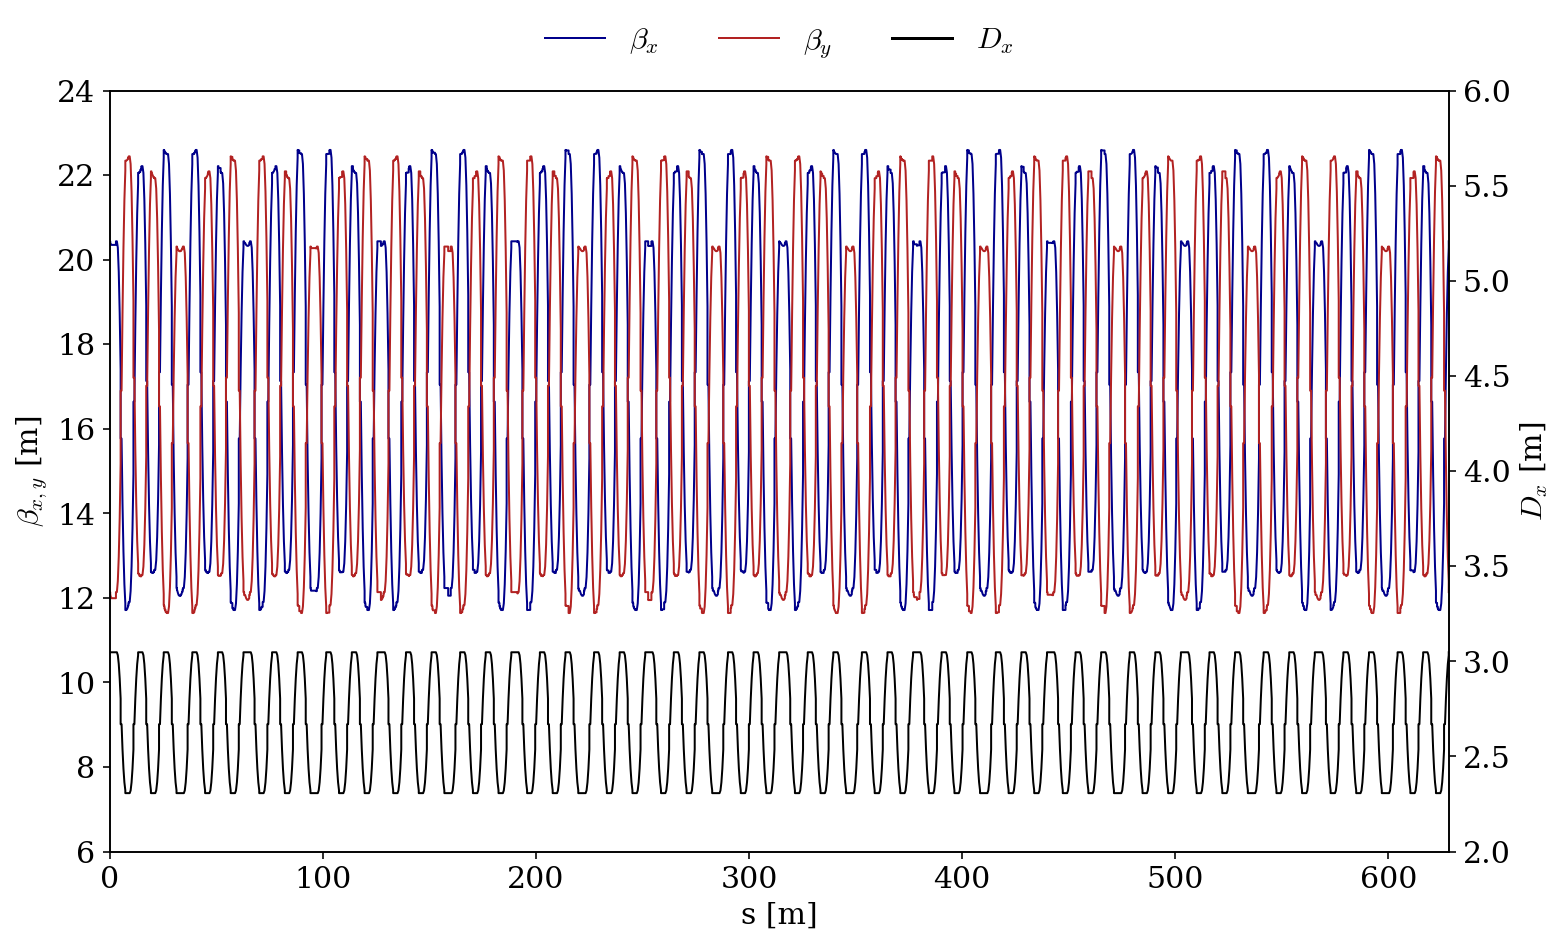

In [38]:
twiss = madx.table['ptc_twiss']

f, ax = plt.subplots(1,figsize = (12,7))

ax.plot(twiss.S, twiss.BETA11, color = 'darkblue', label = r'$\beta_x$', linewidth = 1)
ax.plot(twiss.S, twiss.BETA22, color = 'firebrick', label = r'$\beta_y$', linewidth = 1)
ax.plot(twiss.S, twiss.DISP1*0-100, 'k', label = r'$D_x$')

ax2 = ax.twinx()
ax2.plot(twiss.S, twiss.DISP1, 'k', label = r'$D_x$', linewidth = 1)

y = [6, 24]
dx = [2, 6]

ax.set_xlim(0, 2*np.pi*100)
ax.set_ylim(y)

ax2.set_ylim(dx)

ax.set_xlabel('s [m]')
ax.set_ylabel(r'$\beta_{x,y}$ [m]')
ax2.set_ylabel(r'$D_x$ [m]')

ax.legend(frameon = False, ncol = 3, loc = 'upper center', bbox_to_anchor=(0.5, 1.12))